# Topical Analysis

This notebook extends the analysis done in Filippou et al. (2024) to a topical level.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

chunk_predictions = pd.read_csv("chunk_predictions.csv")
chunk_predictions = chunk_predictions.drop("Text", axis=1)
results_df = chunk_predictions

In [2]:
# Want to aggregate by month instead of quarter

# Step 1: Extract Year and Report Number
results_df["Year"] = results_df["Filename"].str.extract(r"(\d{4})").astype(int)
results_df["Report_Number"] = results_df["Filename"].str.extract(r"\((\d+)\)").astype(int)

# Step 2: Map Report Numbers to Months
    # Got months from Fed website and put them in a spreadsheet
    # See C:\Users\MCOB PHD 14\Desktop\bbFinal\Notebooks\BB_publication_months.xlsx
def get_month(year, report_number):
    # Define mappings for report numbers to months
    if 1970 <= year <= 1978:
        month_mapping = {1: "12", 2: "11", 3: "10", 4: "09", 5: "08", 6: "07", 7: "06", 8: "05", 9: "04", 
                         10: "03", 11: "02", 12: "01"}
    elif year == 1979:
        month_mapping = {1: "11", 2: "10", 3: "09", 4: "08", 5: "07", 6: "05", 7: "04", 8: "03", 9: "01"}
    elif year == 1980:
        month_mapping = {1: "12", 2: "11", 3: "10", 4: "09", 5: "08", 6: "07", 7: "05", 8: "04", 9: "03", 10: "01"}
    elif year in {1981, 2017, 2023}:
        month_mapping = {1: "11", 2: "10", 3: "09", 4: "07", 5: "05", 6: "04", 7: "03", 8: "01"}
    elif year == 2012:
        month_mapping = {1: "11", 2: "10", 3: "08", 4: "07", 5: "06", 6: "04", 7: "02", 8: "01"}
    elif year in {2018, 2020, 2024}:
        month_mapping = {1: "12", 2: "10", 3: "09", 4: "07", 5: "05", 6: "04", 7: "03", 8: "01"}
    elif year in {2002, 2003, 2005, 2006, 2007, 2011, 2016, 2019, 2022}:
        month_mapping = {1: "11", 2: "10", 3: "09", 4: "07", 5: "06", 6: "04", 7: "03", 8: "01"}
    elif year in {2004, 2008, 2009, 2010, 2013, 2014, 2015, 2021}:
        month_mapping = {1: "12", 2: "10", 3: "09", 4: "07", 5: "06", 6: "04", 7: "03", 8: "01"}
    elif year in {1988, 2001}:
        month_mapping = {1: "11", 2: "10", 3: "09", 4: "08", 5: "06", 6: "05", 7: "03", 8: "01"}
    elif year == 1983:
        month_mapping = {1: "12", 2: "11", 3: "09", 4: "08", 5: "07", 6: "05", 7: "03", 8: "02"}
    elif year in {1984, 1985, 1986, 1987, 1990, 1991, 1996, 1997}:
        month_mapping = {1: "12", 2: "10", 3: "09", 4: "08", 5: "06", 6: "05", 7: "03", 8: "01"}
    else:
        month_mapping = {1: "12", 2: "11", 3: "09", 4: "08", 5: "06", 6: "05", 7: "03", 8: "01"}
    return month_mapping.get(report_number, "Unknown")

results_df["Month"] = results_df.apply(lambda row: get_month(row["Year"], row["Report_Number"]), axis=1)

# Step 3: Convert Year and Month to Date-Time Format
results_df["DATE"] = results_df.apply(lambda row: f"{row['Year']}-{row['Month']}-01", axis=1)
results_df["DATE"] = pd.to_datetime(results_df["DATE"], errors="coerce")

# Step 4: Aggregate Data by Month
topic_columns = ["Employment", "Prices", "Consumption", "Manufacturing", "Construction",
                 "Lending", "Uncertainty", "Resources", "Transportation", "Outlook",
                 "Labor", "Capital", "Trade"]

aggregated_df = results_df.groupby("DATE")[topic_columns].sum().reset_index()

# Export to csv
#aggregated_df.to_csv("aggregated_predictions_monthly.csv", index=False)


In [3]:
df = aggregated_df
df['DATE'] = pd.to_datetime(df['DATE'])

# Create dummy variable for dates of recessions
    # Dates defined by Business Cycle Dating Committee of the NBER
df["Recession"] = 0
df.loc[(df["DATE"] >= "1969-12-01") & (df["DATE"] <= "1970-11-01"), "Recession"] = 1
df.loc[(df["DATE"] >= "1973-11-01") & (df["DATE"] <= "1975-03-01"), "Recession"] = 1
df.loc[(df["DATE"] >= "1980-01-01") & (df["DATE"] <= "1980-06-01"), "Recession"] = 1
df.loc[(df["DATE"] >= "1981-07-01") & (df["DATE"] <= "1982-11-01"), "Recession"] = 1
df.loc[(df["DATE"] >= "1990-07-01") & (df["DATE"] <= "1991-03-01"), "Recession"] = 1
df.loc[(df["DATE"] >= "2001-03-01") & (df["DATE"] <= "2001-11-01"), "Recession"] = 1
df.loc[(df["DATE"] >= "2007-12-01") & (df["DATE"] <= "2009-06-01"), "Recession"] = 1
df.loc[(df["DATE"] >= "2020-02-01") & (df["DATE"] <= "2020-04-01"), "Recession"] = 1

# Topic columns
topic_columns = ["Employment", "Prices", "Consumption", "Manufacturing", "Construction",
                 "Lending", "Uncertainty", "Resources", "Transportation", "Outlook",
                 "Labor", "Capital", "Trade"]


In [9]:
# Relative frequencies:
     # Normalize topic counts for each quarter by the total counts across all topics for that quarter.
     # So, each row adds up to 100%: It's the percent of the mentions that are about that topic during that quarter.

relative_frequencies = df
relative_frequencies[topic_columns] = relative_frequencies[topic_columns].div(
    relative_frequencies[topic_columns].sum(axis=1), axis=0
)

df = relative_frequencies

In [12]:
df

,DATE,Employment,Prices,Consumption,Manufacturing,Construction,Lending,Uncertainty,Resources,Transportation,Outlook,Labor,Capital,Trade,Recession
0,1970-05-01,0.111726,0.093936,0.068500,0.017040,0.021816,0.027914,0.061514,0.022483,0.085807,0.174268,0.138574,0.150212,0.026209,1
1,1970-06-01,0.142178,0.078896,0.078454,0.078062,0.022210,0.042627,0.058710,0.008583,0.032759,0.212897,0.091699,0.152923,0.000000,1
2,1970-07-01,0.167990,0.063559,0.083685,0.038431,0.024602,0.036725,0.034685,0.012677,0.000000,0.157217,0.125016,0.225858,0.029556,1
3,1970-08-01,0.183980,0.049135,0.044788,0.089129,0.012679,0.040559,0.013407,0.029401,0.056105,0.182310,0.056377,0.196430,0.045698,1
4,1970-09-01,0.265570,0.186602,0.061059,0.052075,0.022224,0.049764,0.000000,0.034356,0.000000,0.000000,0.098817,0.229533,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2023-11-01,0.009088,0.089403,0.117016,0.037424,0.122450,0.085151,0.067552,0.016460,0.078525,0.153100,0.148796,0.036657,0.038376,0
466,2024-01-01,0.023340,0.123627,0.085859,0.048054,0.129886,0.100590,0.086740,0.042271,0.100829,0.131057,0.104214,0.023535,0.000000,0
467,2024-03-01,0.010065,0.114243,0.097193,0.027631,0.112025,0.079214,0.112218,0.027343,0.156535,0.169552,0.052432,0.020298,0.021250,0
468,2024-04-01,0.000000,0.195431,0.071257,0.035450,0.068082,0.077434,0.127978,0.035082,0.200835,0.036256,0.124930,0.000000,0.027264,0


# Using topical counts to forecast recessions

In [ ]:
# This is the same approach as Table 1, column 4 in Filippou et al. (2024): https://www.clevelandfed.org/publications/economic-commentary/2024/ec-202408-regional-economic-sentiment
# Logit model where 1 = economy in a recession, as defined by NBER

import statsmodels.api as sm

# Drop rows with missing values
df = df.dropna()

# Define X as including all the topic columns
X = df[topic_columns]
# Don't include a constant here because all the topic columns are already proportions that add up to 1
#X = sm.add_constant(X)
y = df['Recession']

# Fit a logit model
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.250456
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Recession   No. Observations:                  470
Model:                          Logit   Df Residuals:                      457
Method:                           MLE   Df Model:                           12
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                  0.3827
Time:                        16:51:13   Log-Likelihood:                -117.71
converged:                       True   LL-Null:                       -190.70
Covariance Type:            nonrobust   LLR p-value:                 3.732e-25
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Employment         9.9314      3.613      2.749      0.006       2.851      17.012
Prices             3.1240      4.435      0.704      0.481      -5.568      11.816
Consumption      -16.9316      6.447     -2.626      0.009     -29.568      -4.296
Manufacturing      9.5643      3.360      2.846      0.004       2.978      16.150
Construction       9.2709      4.497      2.062      0.039       0.457      18.085
Lending          -36.0463      7.468     -4.827      0.000     -50.684     -21.409
Uncertainty      -19.5865      5.313     -3.687      0.000     -30.000      -9.173
Resources         -0.4299      3.074     -0.140      0.889      -6.456       5.596
Transportation    -2.7063      3.542     -0.764      0.445      -9.648       4.235
Outlook           15.8079      2.884      5.482      0.000      10.156      21.460
Labor             -8.2581      4.817     -1.714      0.086     -17.700       1.184
Capital            0.0546      2.649      0.021      0.984      -5.137       5.246
Trade             -1.1489      2.856     -0.402      0.688      -6.747       4.449
==================================================================================
"""

In [15]:
# Test for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Prepare the independent variables (X)
X = df[topic_columns]
#X = sm.add_constant(X)

# Step 2: Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF results
vif_data

,Variable,VIF
0,Employment,4.933787
1,Prices,4.075167
2,Consumption,7.315920
3,Manufacturing,3.743299
4,Construction,4.607630
5,Lending,9.554029
6,Uncertainty,2.702574
7,Resources,3.687504
8,Transportation,2.382494
9,Outlook,2.207644


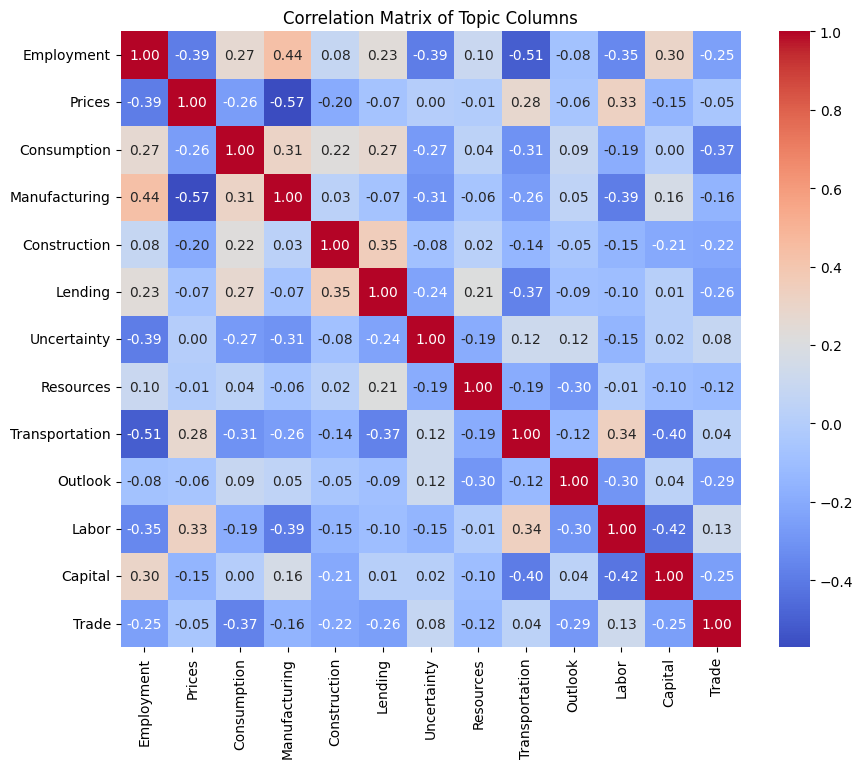

,Employment,Prices,Consumption,Manufacturing,Construction,Lending,Uncertainty,Resources,Transportation,Outlook,Labor,Capital,Trade
Employment,1.000000,-0.390760,0.266632,0.435137,0.081659,0.233476,-0.393313,0.099940,-0.508113,-0.080241,-0.348724,0.301952,-0.248563
Prices,-0.390760,1.000000,-0.262683,-0.571487,-0.197315,-0.069037,0.001159,-0.009464,0.279259,-0.058605,0.329654,-0.152258,-0.051680
Consumption,0.266632,-0.262683,1.000000,0.312346,0.222302,0.270404,-0.271669,0.040994,-0.308742,0.089082,-0.189381,0.000289,-0.370852
Manufacturing,0.435137,-0.571487,0.312346,1.000000,0.030517,-0.072986,-0.305308,-0.061821,-0.264327,0.049077,-0.388911,0.160970,-0.157231
Construction,0.081659,-0.197315,0.222302,0.030517,1.000000,0.350008,-0.084529,0.020428,-0.143488,-0.050494,-0.148148,-0.206190,-0.218921
Lending,0.233476,-0.069037,0.270404,-0.072986,0.350008,1.000000,-0.238448,0.210303,-0.370514,-0.090185,-0.101992,0.014008,-0.257155
Uncertainty,-0.393313,0.001159,-0.271669,-0.305308,-0.084529,-0.238448,1.000000,-0.191863,0.119626,0.119318,-0.153809,0.016677,0.081869
Resources,0.099940,-0.009464,0.040994,-0.061821,0.020428,0.210303,-0.191863,1.000000,-0.192341,-0.295248,-0.008037,-0.102951,-0.123320
Transportation,-0.508113,0.279259,-0.308742,-0.264327,-0.143488,-0.370514,0.119626,-0.192341,1.000000,-0.124330,0.336586,-0.396839,0.038998
Outlook,-0.080241,-0.058605,0.089082,0.049077,-0.050494,-0.090185,0.119318,-0.295248,-0.124330,1.000000,-0.298056,0.038717,-0.286252


In [16]:
# Correlation matrix of topic columns
corr = df[topic_columns].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Topic Columns")
plt.show()

corr

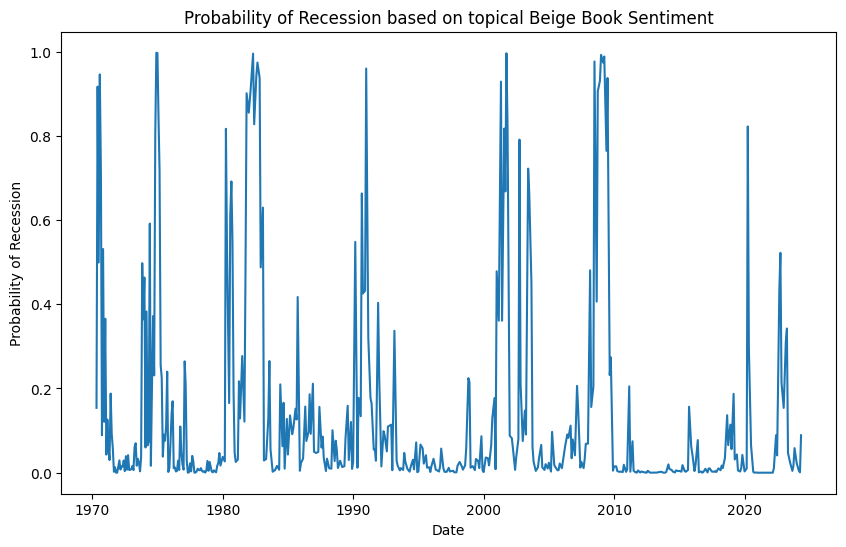

In [9]:
# This recreates Figure 2 from Filippou et al. (2024)
    # Clearly, sentiment from Beige Books is useful for predicting recessions

# Calculate probabilities from the logit model above
df['Recession_probability'] = model.predict(X)

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['Recession_probability'])
plt.xlabel('Date')
plt.ylabel('Probability of Recession')
plt.title('Probability of Recession based on topical Beige Book Sentiment')
plt.show()


# Lags of topical sentiment to predict recessions

This follows Filippou et al., 2024

In [17]:
# Create lags of dependent variable

# Create a three-month lead of the Recession dummy variable
df['Recession_lead_3'] = df['Recession'].shift(3)

# Create a six-month lead of the Recession dummy variable
df['Recession_lead_6'] = df['Recession'].shift(6)

# Create a three-month lag of the Recession dummy variable
df['Recession_lag_3'] = df['Recession'].shift(-3)

# Create a six-month lag of the Recession dummy variable
df['Recession_lag_6'] = df['Recession'].shift(-6)

In [19]:
# This is the same approach as Table 1, column 2 in Filippou et al. (2024): https://www.clevelandfed.org/publications/economic-commentary/2024/ec-202408-regional-economic-sentiment

# Drop rows with missing values
dfBinary = df.dropna()

# Define X as including all the topic columns
X = dfBinary[topic_columns]
#X = sm.add_constant(X)

# Define y as the six-month lag of the Recession dummy variable
y = dfBinary['Recession_lag_6']

# Fit the model with a logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.318194
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Recession_lag_6   No. Observations:                  458
Model:                          Logit   Df Residuals:                      445
Method:                           MLE   Df Model:                           12
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                  0.1717
Time:                        16:53:45   Log-Likelihood:                -145.73
converged:                       True   LL-Null:                       -175.94
Covariance Type:            nonrobust   LLR p-value:                 1.904e-08
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Employment       -17.8671      4.241     -4.213      0.000     -26.179      -9.556
Prices             2.3173      3.313      0.700      0.484      -4.176       8.810
Consumption       -2.7991      4.751     -0.589      0.556     -12.111       6.513
Manufacturing      5.1919      3.091      1.680      0.093      -0.867      11.251
Construction       7.4379      3.295      2.258      0.024       0.981      13.895
Lending           -5.8152      4.965     -1.171      0.242     -15.547       3.917
Uncertainty      -17.5982      4.208     -4.182      0.000     -25.846      -9.351
Resources          6.6955      2.645      2.531      0.011       1.510      11.880
Transportation    -4.1619      2.673     -1.557      0.119      -9.400       1.076
Outlook            6.6830      2.313      2.889      0.004       2.150      11.216
Labor             -7.8684      3.197     -2.461      0.014     -14.135      -1.602
Capital           -2.1763      2.526     -0.862      0.389      -7.126       2.774
Trade             -1.6817      2.159     -0.779      0.436      -5.913       2.550
==================================================================================
"""

In [20]:
# This is the same approach as Table 1, column 3 in Filippou et al. (2024): https://www.clevelandfed.org/publications/economic-commentary/2024/ec-202408-regional-economic-sentiment

# Run the regression
import statsmodels.api as sm

# Drop rows with missing values
dfBinary = df.dropna()

# Define X as including all the topic columns
X = dfBinary[topic_columns]
#X = sm.add_constant(X)

# Define y as the 3-month lag of the Recession dummy variable
y = dfBinary['Recession_lag_3']

# Fit the model with a logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.309850
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Recession_lag_3   No. Observations:                  458
Model:                          Logit   Df Residuals:                      445
Method:                           MLE   Df Model:                           12
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                  0.1934
Time:                        16:53:54   Log-Likelihood:                -141.91
converged:                       True   LL-Null:                       -175.94
Covariance Type:            nonrobust   LLR p-value:                 7.408e-10
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Employment        -7.6231      3.692     -2.065      0.039     -14.860      -0.386
Prices             2.8151      3.754      0.750      0.453      -4.543      10.173
Consumption       -9.8609      5.321     -1.853      0.064     -20.290       0.568
Manufacturing      8.1005      3.098      2.615      0.009       2.029      14.172
Construction       7.2684      3.731      1.948      0.051      -0.045      14.582
Lending          -12.0335      5.450     -2.208      0.027     -22.716      -1.351
Uncertainty      -14.3024      4.205     -3.401      0.001     -22.545      -6.060
Resources          1.6520      2.770      0.596      0.551      -3.778       7.082
Transportation    -6.1600      3.375     -1.825      0.068     -12.775       0.455
Outlook           10.5224      2.374      4.432      0.000       5.869      15.176
Labor             -7.9891      3.923     -2.037      0.042     -15.678      -0.300
Capital           -2.2579      2.522     -0.895      0.371      -7.200       2.684
Trade             -1.2564      2.304     -0.545      0.586      -5.773       3.260
==================================================================================
"""

In [21]:
# This is the same approach as Table 1, column 5 in Filippou et al. (2024): https://www.clevelandfed.org/publications/economic-commentary/2024/ec-202408-regional-economic-sentiment

# Drop rows with missing values
dfBinary = df.dropna()

# Define X as including all the topic columns
X = dfBinary[topic_columns]
#X = sm.add_constant(X)

# Define y as the 3-month lead of the Recession dummy variable
y = dfBinary['Recession_lead_3']

# Fit the model with a logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.234311
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Recession_lead_3   No. Observations:                  458
Model:                          Logit   Df Residuals:                      445
Method:                           MLE   Df Model:                           12
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                  0.4150
Time:                        16:54:01   Log-Likelihood:                -107.31
converged:                       True   LL-Null:                       -183.43
Covariance Type:            nonrobust   LLR p-value:                 2.001e-26
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Employment        13.4264      4.001      3.355      0.001       5.584      21.269
Prices             4.8683      4.775      1.020      0.308      -4.490      14.227
Consumption      -11.8838      6.316     -1.881      0.060     -24.264       0.496
Manufacturing      8.2200      3.435      2.393      0.017       1.487      14.953
Construction       2.9831      4.544      0.657      0.511      -5.922      11.888
Lending          -26.0172      7.203     -3.612      0.000     -40.134     -11.900
Uncertainty       -5.2537      4.357     -1.206      0.228     -13.793       3.285
Resources         -4.9349      3.435     -1.437      0.151     -11.667       1.797
Transportation    -2.9529      4.268     -0.692      0.489     -11.318       5.413
Outlook           11.0455      2.714      4.069      0.000       5.726      16.365
Labor            -16.1675      6.070     -2.663      0.008     -28.065      -4.270
Capital           -0.0696      2.610     -0.027      0.979      -5.185       5.046
Trade            -16.8027      4.871     -3.449      0.001     -26.350      -7.255
==================================================================================
"""

In [22]:
# This is the same approach as Table 1, column 6 in Filippou et al. (2024): https://www.clevelandfed.org/publications/economic-commentary/2024/ec-202408-regional-economic-sentiment

# Drop rows with missing values
dfBinary = df.dropna()

# Define X as including all the topic columns
X = dfBinary[topic_columns]
#X = sm.add_constant(X)

# Define y as the 6-month lead of the Recession dummy variable
y = dfBinary['Recession_lead_6']

# Fit the model with a logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.275181
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Recession_lead_6   No. Observations:                  458
Model:                          Logit   Df Residuals:                      445
Method:                           MLE   Df Model:                           12
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                  0.3326
Time:                        16:54:20   Log-Likelihood:                -126.03
converged:                       True   LL-Null:                       -188.85
Covariance Type:            nonrobust   LLR p-value:                 4.610e-21
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Employment         7.5894      3.341      2.271      0.023       1.040      14.139
Prices            -2.5517      4.053     -0.630      0.529     -10.495       5.392
Consumption       -8.4466      5.150     -1.640      0.101     -18.540       1.647
Manufacturing      0.1985      2.979      0.067      0.947      -5.640       6.038
Construction       0.0876      3.956      0.022      0.982      -7.667       7.842
Lending           -1.0759      5.367     -0.200      0.841     -11.595       9.443
Uncertainty       -4.8309      3.611     -1.338      0.181     -11.908       2.246
Resources        -10.2159      3.792     -2.694      0.007     -17.647      -2.784
Transportation    -3.2186      4.043     -0.796      0.426     -11.142       4.705
Outlook            7.1212      2.282      3.120      0.002       2.648      11.595
Labor             -9.5049      4.764     -1.995      0.046     -18.841      -0.168
Capital            4.4491      2.246      1.981      0.048       0.047       8.851
Trade            -21.4044      4.876     -4.390      0.000     -30.961     -11.848
==================================================================================
"""

# Principal Component Analysis

May come back and do something with this but probably beyond the scope of this article. Because I'd rather be able to explain each topic individually. -- CS 11/29/2024

Explained Variance by Components:
   Component  Explained Variance Ratio
0       PC1                  0.284081
1       PC2                  0.197726
2       PC3                  0.100690
3       PC4                  0.082555
4       PC5                  0.078502


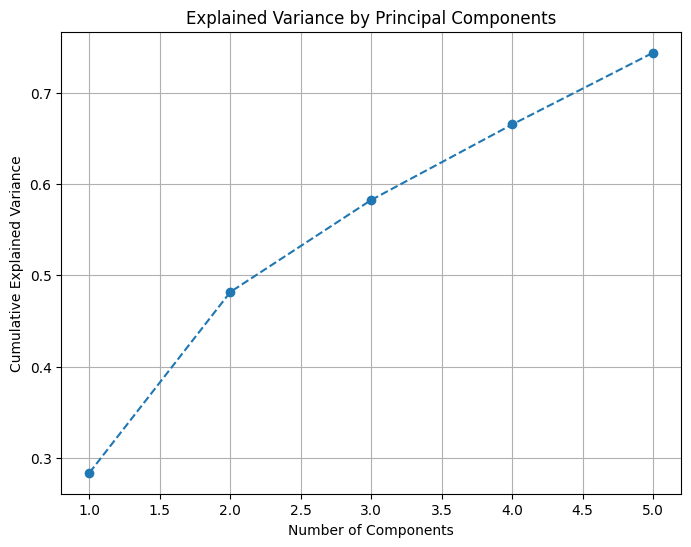

PCA Topic Loadings:
      Employment    Prices  Consumption  Manufacturing  Construction   Lending  \
PC1    0.407581 -0.342198     0.327559       0.346733      0.227705  0.271669   
PC2   -0.024090  0.306701     0.297799       0.200163      0.343969  0.211815   
PC3   -0.289522  0.019654    -0.025139      -0.399419      0.335882  0.512844   
PC4    0.039763 -0.134742     0.070577       0.212334      0.216287 -0.014509   
PC5   -0.192136 -0.232558    -0.218651      -0.183831      0.138745  0.159481   

     Uncertainty  Resources  Transportation   Outlook     Labor   Capital  \
PC1    -0.081782   0.043589       -0.271174  0.148573 -0.372996  0.280062   
PC2     0.404674  -0.104035        0.383784  0.460371  0.256107  0.016975   
PC3    -0.132274  -0.043353       -0.130819  0.071493 -0.131719 -0.436699   
PC4    -0.055871   0.799179        0.168773 -0.184503  0.081883 -0.382365   
PC5     0.544148   0.079579       -0.303758 -0.018516 -0.259530  0.130167   

        Trade  
PC1 -0.204566

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare topic data for PCA
topic_data = aggregated_df[topic_columns]

# Step 2: Standardize the data (important for PCA)
scaler = StandardScaler()
topic_data_scaled = scaler.fit_transform(topic_data)

# Step 3: Perform PCA
n_components = 5  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(topic_data_scaled)

# Step 4: Create a DataFrame for the principal components
pca_columns = [f"PC{i+1}" for i in range(n_components)]
pca_df = pd.DataFrame(principal_components, columns=pca_columns)
pca_df["DATE"] = aggregated_df["DATE"]  # Include dates for reference

# Step 5: Analyze explained variance
explained_variance = pd.DataFrame({
    "Component": pca_columns,
    "Explained Variance Ratio": pca.explained_variance_ratio_
})
print("Explained Variance by Components:\n", explained_variance)

# Plot cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker="o", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid()
plt.show()

# Step 6: Examine topic loadings
loadings = pd.DataFrame(pca.components_, columns=topic_columns, index=pca_columns)
print("PCA Topic Loadings:\n", loadings)
